# Making pretty plots in Python


![](pretty-plots/before_and_after.png)

In 2007, Jiro Doke of the Mathworks (makers of Matlab) changed my perspective on what plots from programming languages had the potential to be through his fantastic piece simply titled [Making Pretty Graphs](https://blogs.mathworks.com/loren/2007/12/11/making-pretty-graphs/){% fn 1 %}. Today, I think we could all make prettier, more professional graphs, and here I'll walk through some tips for making attractive, publication-quality plots in Python with `matplotlib`.

I'd like to broadly classify plots into three categories:
1. **Bad plots**. Bad plots have *no one* in mind and typically confuse. Bad plots are quick to make, but hard for a reader to interpret. Telltale signs of a bad plot are missing axes labels, units, or some form of legend; lines or markers that are hard to distinguish from one another; a plot that is difficult to read because it either lacks  necessary information or is blurry. 
2. **Decent plots**. Decent plots are a tool for the *author* to quickly explore the data, determine the takeaways, and share that information when they are able to be present and explain the key takeaways. Decent plots have the necessary information to enable correct interpretation of the data presented. Telltale signs of decent plots are axes labels, legends, units, and distinguishable lines and markers. Decent plots are fast and practical.
3. **Great plots**. Great plots are designed with the *reader* in mind and clearly make a point. They have all of the telltale signs of decent plots, but take extra care to make the reader's experience as easy as possible by using color and typography for clarity and emphasis, are crystal clear in resolution, and are memorable and worthy of sharing. Great plots are for communicating with the larger world in papers, presentations, and on the web.

Making great plots takes more time, but can pay off in clarity and professionalism. Here, we'll walk through one example of transforming a **decent** plot into a **great** plot.

## Start with a "decent" plot
Let's begin by gathering our data. We'll use the same dataset as earlier. Again, let's use our data that consists of reporting the efficiency of three models as you vary the size of a parameter that is in square meters; we will name these three models "A", "B", and "C". We will also set a baseline efficiency value against which we want to compare all the models. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# For displaying Jupyter notebooks on Retina displays
%config InlineBackend.figure_format = 'retina'

In [3]:
# Create some data to plot
x = [1,2,3,4,5]
y1 = [3.64, 9.46, 16.95, 37.14, 68.22]
y2 = [22.05, 22.49, 30.65, 53.58, 47.33]
y3 = [16.82, 26.10, 49.61, 47.59, 95.82]
y = [y1,y2,y3] # Store each series of the data in one list

labels = ['Model A', 'Model B', 'Model C']
baseline = 40

For the simplest "decent" plot, we use the default settings of `matplotlib` and a very few lines of code, making sure that we label our axes and include a legend. This quickly produces a plot that contains all of the necessary information to interpret our data, but is not overly compelling.

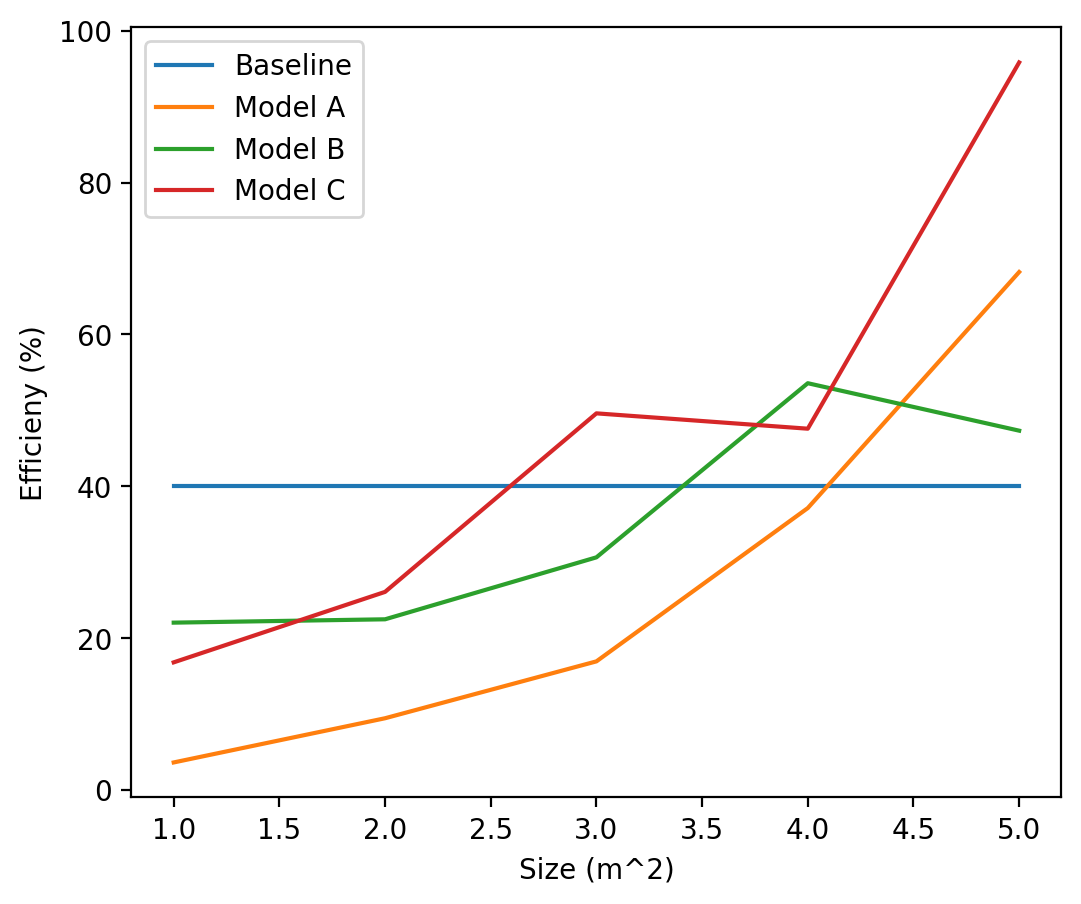

In [4]:
fig, ax = plt.subplots(figsize=(6,5)) # This sets the figure size to 6 inches wide by 5 inches high

# Plot the baseline
ax.plot([x[0],x[-1]],[baseline, baseline],label="Baseline")

# Plot the three model lines
for i, label in enumerate(labels):
    ax.plot(x,y[i],label=label)

ax.set_xlabel('Size (m^2)')
ax.set_ylabel('Efficieny (%)')
ax.legend()
plt.show()

This is perfect if the goal is for the author of the plot to understand the plotted data and draw conclusions. And it's likely alright for sharing around the office or lab when we're able to talk through this with a colleague and explain what the key takeaways are. But we can do better! How do we improve this plot and make it ready for a formal presentation of the material?

## 1. Distinguish different types of information
First of all, it's not clear that the baseline is any different from the rest of the lines. In our data, the baseline is a single value that's plotted for comparison, and should be so distinguished in the plot. Let's start by making the baseline a different color and style from the rest of the lines to indicate it is different from the rest.

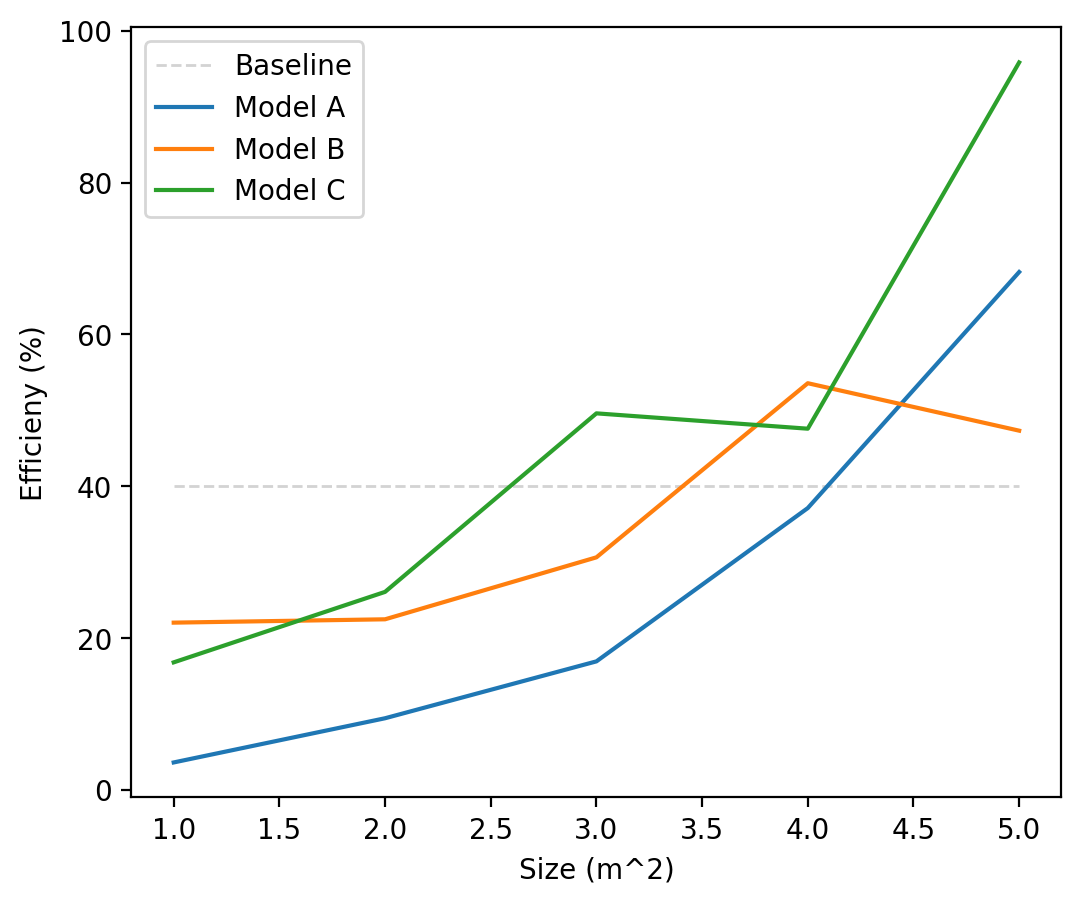

In [5]:

fig, ax = plt.subplots(figsize=(6,5))

# -------------------BEGIN-CHANGES------------------------
# Plot the baseline
ax.plot([x[0],max(x)],[baseline, baseline],label="Baseline",
        color='lightgray',
        linestyle='--',
        linewidth=1)
# --------------------END CHANGES------------------------

for i, label in enumerate(labels):
    ax.plot(x,y[i],label=label)

ax.set_xlabel('Size (m^2)')
ax.set_ylabel('Efficieny (%)')
ax.legend()
plt.show()

## 2. Emphasize what's important by using colors strategically
The line colors in this plot are pretty random and don't distinguish between the other lines. In some cases that may be fine if there is no reason why any one line should stand out from the rest, but for our case, we want to emphasize the top performing model (Model C) and distinguish it from the rest. This can be easily accomplished by making one line a strong color, like red in this case, and using different shades of another color to group the rest (grey in this case), causing the line we're trying to emphasize to pop out.

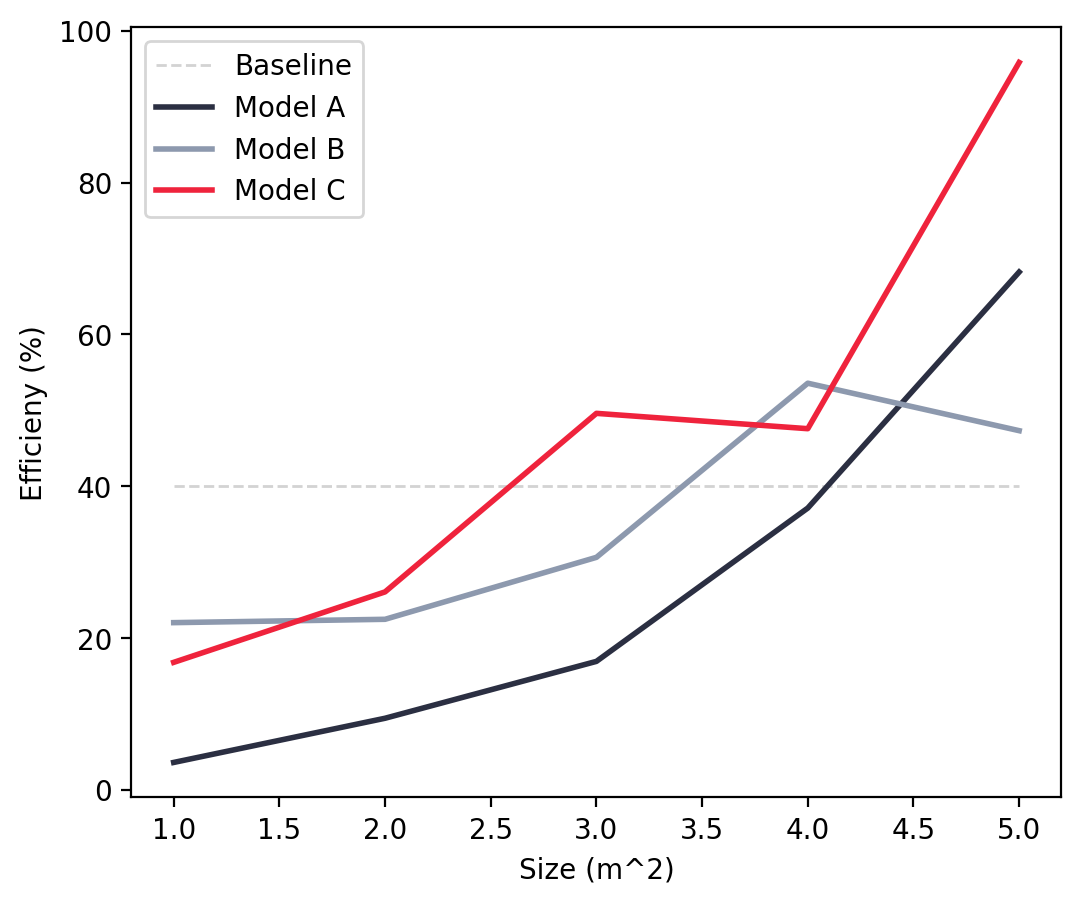

In [7]:
fig, ax = plt.subplots(figsize=(6,5))

# Plot the baseline
ax.plot([x[0],max(x)],[baseline, baseline],label="Baseline",
        color='lightgray',
        linestyle='--',
        linewidth=1)

# Define a nice color palette:
colors = ['#2B2F42','#8D99AE','#EF233C']

# -------------------BEGIN-CHANGES------------------------
# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax.plot(x,y[i],label=label,
        color=colors[i],
        linewidth=2)
# --------------------END CHANGES------------------------

ax.set_xlabel('Size (m^2)')
ax.set_ylabel('Efficieny (%)')
ax.legend()
plt.show()

The right choice of colors may be one of the most simplest ways to make your plots look unique and professional. Plots made with defaults settings are often recognizable; I can often tell whether the author of a plot used Excel, `matplotlib`, or `ggplot2` just by the colors used in the plot and the default aesthetic.

Consider using tools to help you choose custom color palettes for your own aesthetic. There are some great options available. The colors for this plot were chosen using [Coolors](https://coolors.co/2b2f42-8d99ae-edf2f4-ef233c-d80032) (the link brings you to the specific color palette used for this plot). There are some other great tools for selecting color palettes including [Paletton](https://paletton.com/#uid=1000u0kllllaFw0g0qFqFg0w0aF) if you want to dive deeper into color theory and [Color Brewer](http://colorbrewer2.org) which can create palettes with lots of colors (up to 12 colors).

## 3. Ditch the box
Our plot is already telling a much more compelling story, but there is still room for improvement. Edward Tufte, author of a number of influential data visualization books, introduced the concept of the data-to-ink ratio for plots, which states that the most "ink" (for the digital age, think pixels) in a chart should be devoted to displaying the data and not used for other components. Applying that principle here, the box doesn't really add value. We just need some axes. Let's remove the top and right components of the box, and leave only the y-ticks on the left of the plot. 

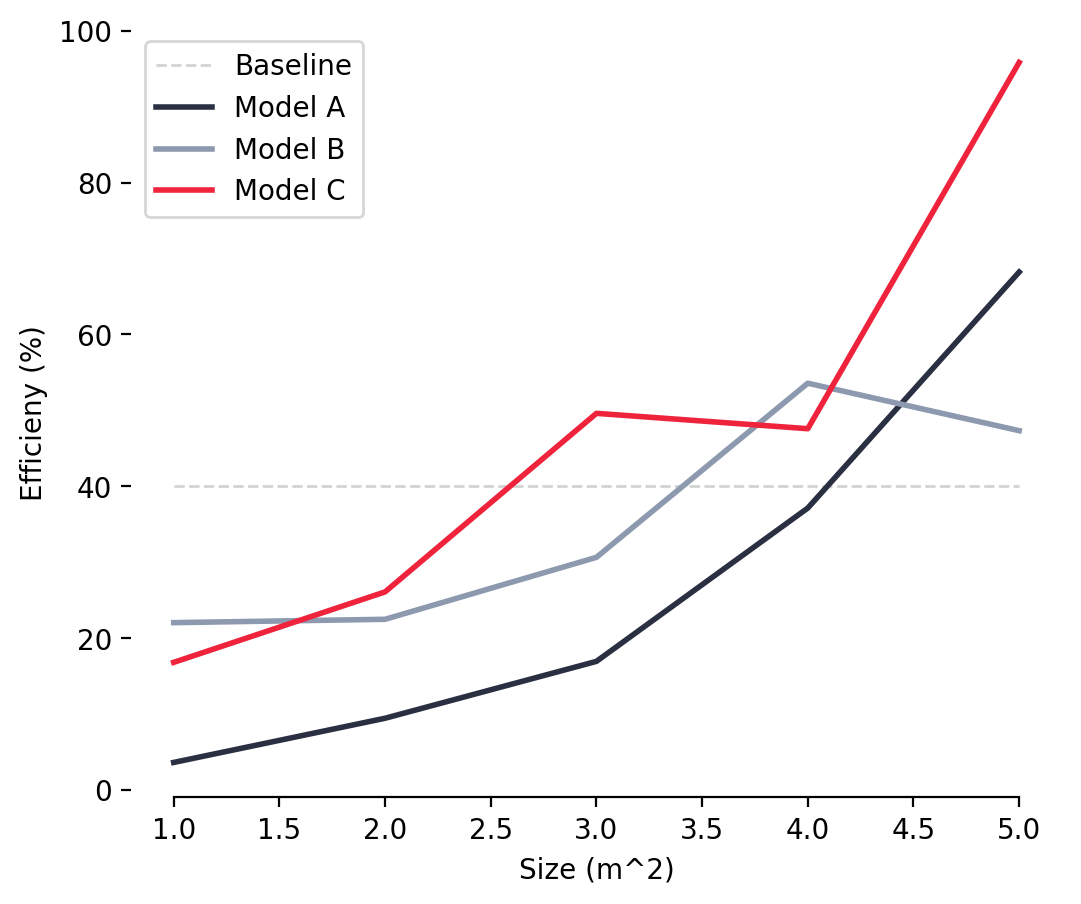

In [8]:
fig, ax = plt.subplots(figsize=(6,5))

# Plot the baseline
ax.plot([x[0],max(x)],[baseline, baseline],label="Baseline",
        color='lightgray',
        linestyle='--',
        linewidth=1)

# Define a nice color palette:
colors = ['#2B2F42','#8D99AE','#EF233C']

# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax.plot(x,y[i],label=label,
        color=colors[i],
        linewidth=2)

# -------------------BEGIN-CHANGES------------------------
# Hide the all but the bottom spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_bounds(min(x),max(x))    
# --------------------END CHANGES------------------------

ax.set_xlabel('Size (m^2)')
ax.set_ylabel('Efficieny (%)')
ax.legend()
plt.show()

This helps our reader focus in on the content of the plot, since there's little else to distract the reader.

## 4. Make the legend be effortless to read
Legends are vital for interpreting the plot, but having a separate legend in a line plot adds in an additional layer of effort for the reader to refer back and forth to the legend to understand the data. With the reader in mind, we can make this easier, buy putting the label of the legend right at the end of the plot and coloring the text of the legend the same as the line color to make the act entirely effortless. We'll also set the x-ticks to be whole numbers to clean up the x-axis as well.

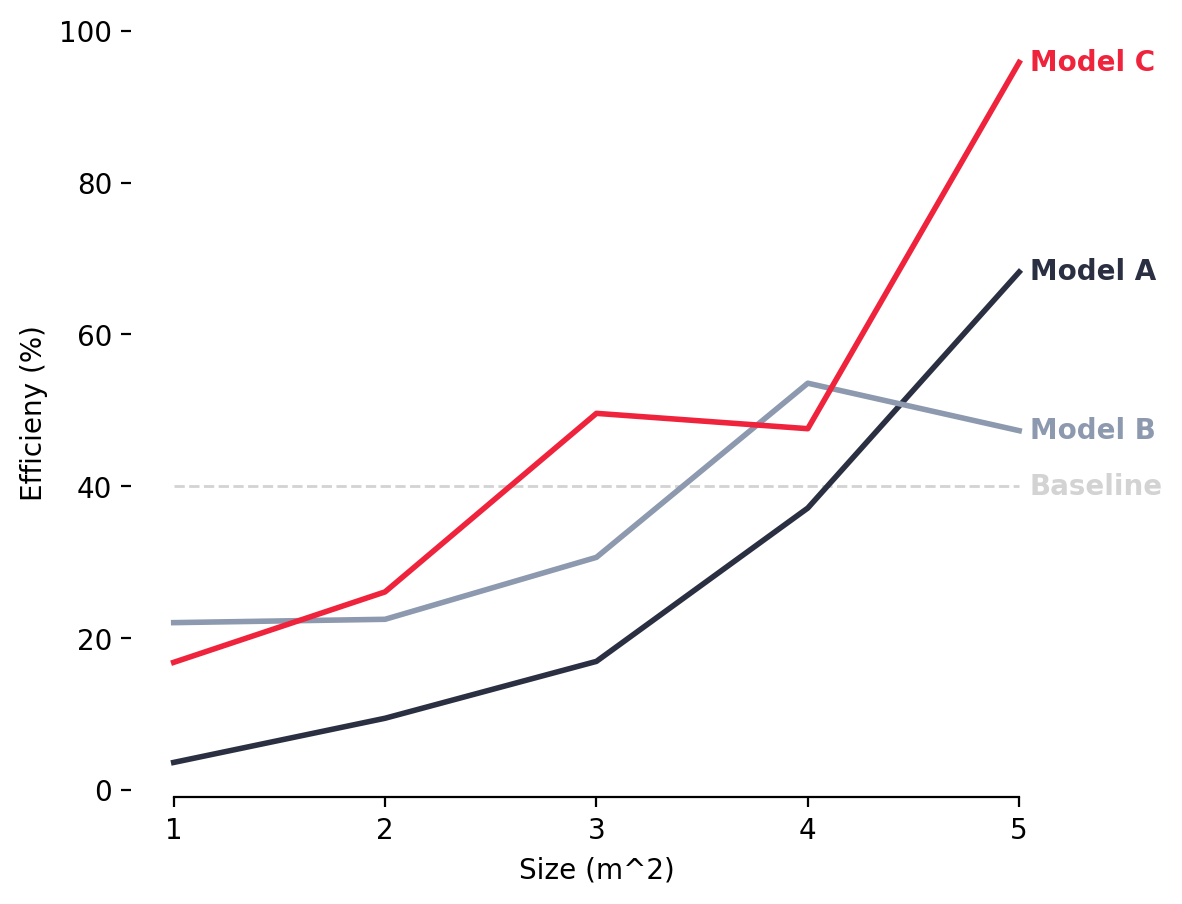

In [11]:
fig, ax = plt.subplots(figsize=(6,5))

# Plot the baseline
ax.plot([x[0],max(x)],[baseline, baseline],label="Baseline",
        color='lightgray',
        linestyle='--',
        linewidth=1)

# -------------------BEGIN-CHANGES------------------------
# Plot the baseline text
ax.text(x[-1]*1.01,baseline,"Baseline",
        color='lightgray',
        fontweight='bold',
        horizontalalignment='left',
        verticalalignment='center')
# --------------------END CHANGES------------------------

# Define a nice color palette:
colors = ['#2B2F42','#8D99AE','#EF233C']

# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax.plot(x,y[i],label=label,
        color=colors[i],
        linewidth=2)
    
    # -------------------BEGIN-CHANGES------------------------
    # Text
    ax.text(x[-1]*1.01,y[i][-1],label,
        color=colors[i],
        fontweight='bold',
        horizontalalignment='left',
        verticalalignment='center')
    # --------------------END CHANGES------------------------

# Hide the all but the bottom spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_bounds(min(x),max(x))  
# -------------------BEGIN-CHANGES------------------------
ax.set_xticks(np.arange(min(x),max(x)+1)) 
# --------------------END CHANGES------------------------

ax.set_xlabel('Size (m^2)')
ax.set_ylabel('Efficieny (%)')
# plt.legend()  # REMOVE THE ORIGINAL LEGEND
plt.show()

## 5. Size fonts for the reader


Fonts can also add legibility and professionalism. Let's increase the font size across the plot to make the text more legible. We'll also enable TeX typesetting in our labels so that the exponent is displayed properly in the x-axis label as $m^2$ rather than m^2.

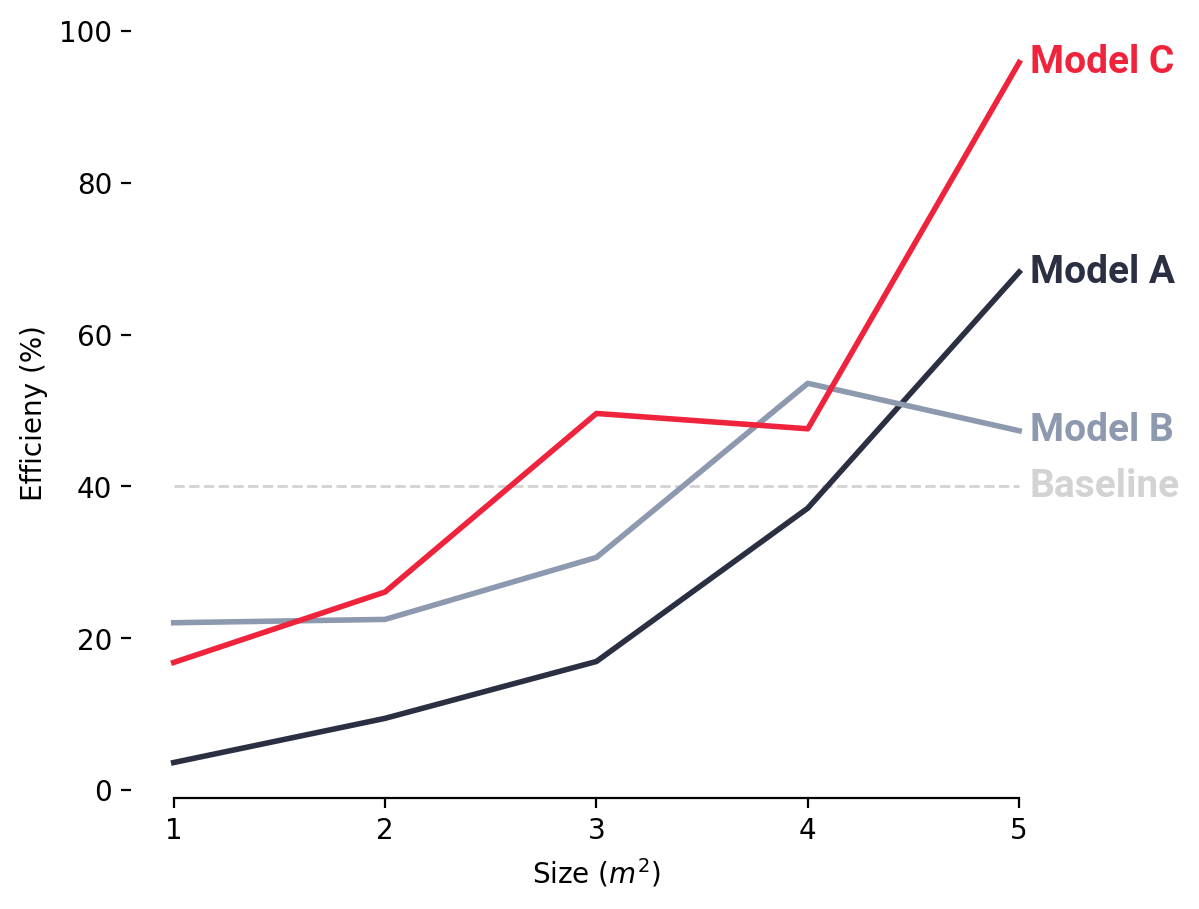

In [12]:
fig, ax = plt.subplots(figsize=(6,5))

# -------------------BEGIN-CHANGES------------------------
# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc('font', family='Roboto')           # controls default font
plt.rc('font', weight='normal')              # controls default font
plt.rc('font', size=SIZE_DEFAULT)       # controls default text sizes
plt.rc('axes', titlesize=SIZE_LARGE)    # fontsize of the axes title
plt.rc('axes', labelsize=SIZE_LARGE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE_DEFAULT) # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE_DEFAULT) # fontsize of the tick labels
# --------------------END CHANGES------------------------

# Plot the baseline
ax.plot([x[0],max(x)],[baseline, baseline],label="Baseline",
        color='lightgray',
        linestyle='--',
        linewidth=1)

# Plot the baseline text
ax.text(x[-1]*1.01,baseline,"Baseline",
        color='lightgray',
        fontweight='bold',
        horizontalalignment='left',
        verticalalignment='center')

# Define a nice color palette:
colors = ['#2B2F42','#8D99AE','#EF233C']

# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax.plot(x,y[i],label=label,
        color=colors[i],
        linewidth=2)
    
    # Text
    ax.text(x[-1]*1.01,y[i][-1],label,
        color=colors[i],
        fontweight='bold',
        horizontalalignment='left',
        verticalalignment='center')
    
# Hide the all but the bottom spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_bounds(min(x),max(x))    

# -------------------BEGIN-CHANGES------------------------
ax.set_xlabel(r'Size ($m^2$)') # Enable TeX typesetting of the superscript
# --------------------END CHANGES-------------------------
ax.set_ylabel('Efficieny (%)') 
plt.show()

## 6. Make your figure crystal clear by saving at a high resolution
The final step is to save the figure to a crystal clear image file to be used in a presentation, publication, or whatever it may be. You'll want to save your figure to be sufficiently high resolution so it is not blurry when you use it. You'll certainly want the resolution to be at least 150 dots per inch (DPI) for web applications (for higher resolution monitors), with 300 DPI and above appropriate for printing. There is a tradeoff between resolution and file size that needs to be made in each case.

I always recommend setting your figure size explicitly as well, to meet the needs of your particular application.

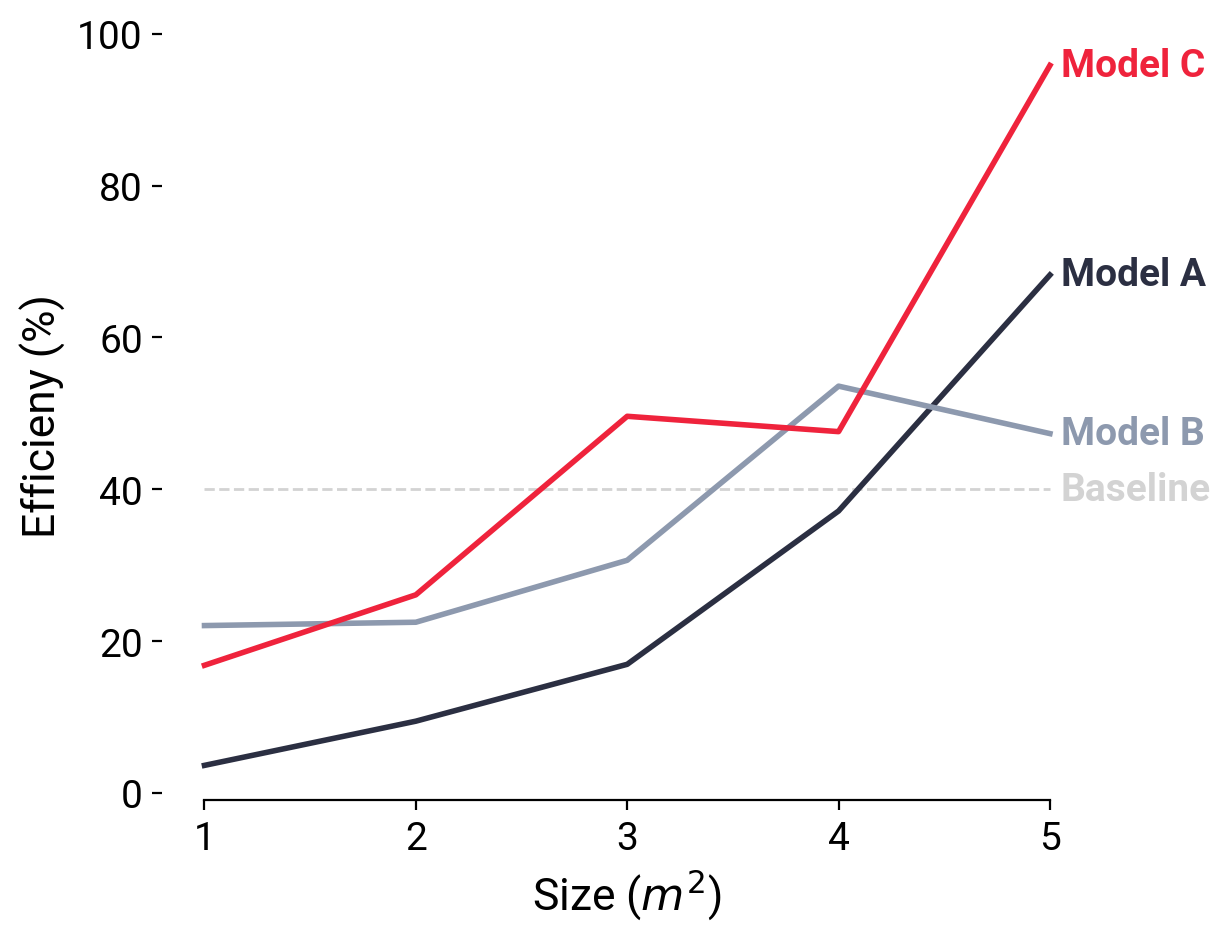

In [13]:
fig, ax = plt.subplots(figsize=(6,5))

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc('font', family='Roboto')           # controls default font
plt.rc('font', weight='normal')              # controls default font
plt.rc('font', size=SIZE_DEFAULT)       # controls default text sizes
plt.rc('axes', titlesize=SIZE_LARGE)    # fontsize of the axes title
plt.rc('axes', labelsize=SIZE_LARGE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE_DEFAULT) # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE_DEFAULT) # fontsize of the tick labels

# Plot the baseline
ax.plot([x[0],max(x)],[baseline, baseline],label="Baseline",
        color='lightgray',
        linestyle='--',
        linewidth=1)

# Plot the baseline text
ax.text(x[-1]*1.01,baseline,"Baseline",
        color='lightgray',
        fontweight='bold',
        horizontalalignment='left',
        verticalalignment='center')

# Define a nice color palette:
colors = ['#2B2F42','#8D99AE','#EF233C']

# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax.plot(x,y[i],label=label,
        color=colors[i],
        linewidth=2)
    
    # Text
    ax.text(x[-1]*1.01,y[i][-1],label,
        color=colors[i],
        fontweight='bold',
        horizontalalignment='left',
        verticalalignment='center')

# Hide the all but the bottom spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_bounds(min(x),max(x))    

ax.set_xlabel(r'Size ($m^2$)')
ax.set_ylabel('Efficieny (%)')

# -------------------BEGIN-CHANGES------------------------
plt.savefig('great.png', dpi=300)
# --------------------END CHANGES------------------------

![](pretty-plots/great.png "Caption: The final product of the figure")

## Other recommendations

### Style guides
One way to develop a consistent, professional style of plot is to create or adopt a style guide that lays out practices regarding colors, fonts, and organization. A style guide can transform the act of making compelling,  plots into a routine process and providing consisten professionalism. My personal favorite example is the [style guide from the Urban Institute](https://urbaninstitute.github.io/graphics-styleguide/), which gives examples of multiple types of plots, typography, color palettes, and even template for producing them.

> The greatest value of a picture is when it forces us to notice what we never expected to see. **John Tukey**